<a href="https://colab.research.google.com/github/smit1802/Intrusion-Detection-System/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
  


In [ ]:
url= 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
df= pd.read_csv(url, header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.columns= [ 'duration','protocol_type', 'service', 'flag', 'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
'is_host_login', 'is_guest_login','cnt','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']
print(df.describe())

            duration     src_bytes     dst_bytes           land  \
count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
mean       47.979302  3.025610e+03  8.685324e+02       0.000045   
std       707.746472  9.882181e+05  3.304000e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494021.000000  494021.000000  494021.000000      494021.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

In [ ]:
df['outcome'].unique()


array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [ ]:
df=df.replace(to_replace =["ipsweep.","portsweep.","nmap.","satan."],  value ="probe")
df=df.replace(to_replace =["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."],  value ="r2l")
df=df.replace(to_replace =["buffer_overflow.","loadmodule.","perl.", "rootkit."],  value ="u2r")
df=df.replace(to_replace =["back.", "land.","neptune.", "pod.","smurf.","teardrop."],value ="dos")
from collections import Counter
Counter(df['outcome'])

Counter({'dos': 391458,
         'normal.': 97278,
         'probe': 4107,
         'r2l': 1126,
         'u2r': 52})

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['protocol_type']= label_encoder.fit_transform(df['protocol_type'])  
df['service']= label_encoder.fit_transform(df['service'])  
df['flag']= label_encoder.fit_transform(df['flag'])  
df['outcome']= label_encoder.fit_transform(df['outcome'])  

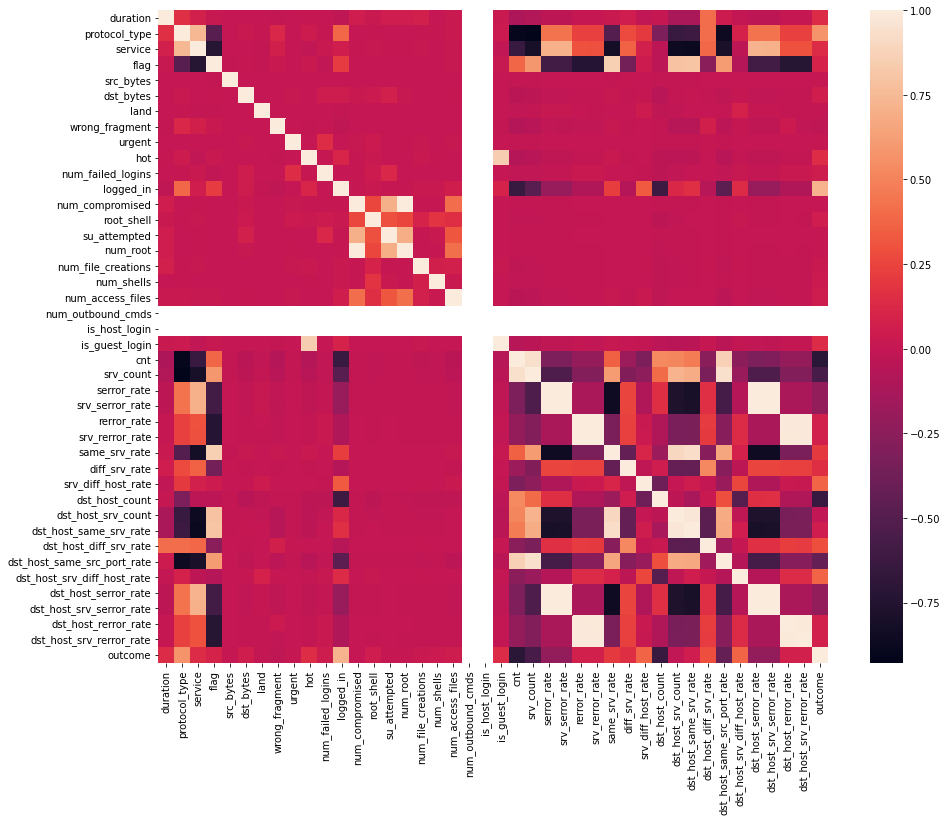

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [ ]:
print('{:>30} {:>30} {:>30}'.format(*["Feature 1","Feature 2","Correlation"]))
x=[]
c=corr
for i in c:
    for j in c:
        if((corr[i][j]>0.97) and i!=j and (i not in x)):
            l=len(i)+len(j)
            print('{:>30} {:>30} {:>30}'.format(*[i,j,corr[i][j]]))
            x.append(i)

                     Feature 1                      Feature 2                    Correlation
               num_compromised                       num_root             0.9938277978737944
                      num_root                num_compromised             0.9938277978737944
                   serror_rate                srv_serror_rate             0.9983615072725139
               srv_serror_rate                    serror_rate             0.9983615072725139
                   rerror_rate                srv_rerror_rate             0.9947309539817971
               srv_rerror_rate                    rerror_rate             0.9947309539817971
            dst_host_srv_count         dst_host_same_srv_rate             0.9736854572954048
        dst_host_same_srv_rate             dst_host_srv_count             0.9736854572954048
          dst_host_serror_rate                    serror_rate              0.998672968010478
      dst_host_srv_serror_rate                    serror_rate         

In [ ]:
for i in x:
    if(i in df.columns):
        df.drop(i,axis=1,inplace=True)

In [ ]:
df.drop('is_host_login',axis = 1, inplace=True)
df.drop('num_outbound_cmds',axis = 1, inplace=True)

In [ ]:
X= df.drop(['outcome'], axis=1)
Y=df['outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=4 )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rf = RandomForestClassifier(random_state=20,n_estimators=20)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=20)

In [ ]:
y_preds=rf.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print("Accuracy:",metrics.accuracy_score(y_test,y_preds)) 
print(metrics.classification_report(y_test,y_preds))

[[78251     4     0     0     0]
 [    2 19520     0     1     0]
 [    1     2   783     0     0]
 [    0     2     0   224     1]
 [    0     5     0     1     8]]
Accuracy: 0.9998077020393705
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78255
           1       1.00      1.00      1.00     19523
           2       1.00      1.00      1.00       786
           3       0.99      0.99      0.99       227
           4       0.89      0.57      0.70        14

    accuracy                           1.00     98805
   macro avg       0.98      0.91      0.94     98805
weighted avg       1.00      1.00      1.00     98805

